# 정교한 결과 도출을 위한 데이터 전처리 (KNeighborsClassifier)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import collections
from sklearn.neighbors import KNeighborsClassifier

In [2]:
fruits = pd.read_csv('../Data/fruits.csv')
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


### Feature Set과 Target Set을 Numpy Array로 변경

> pandas를 numpy로 바꿔서 활용해보기

In [9]:
testA = np.array([1,2,3,4])
print(testA)
testB = np.array([10,20,30,40])
print(testB)

[1 2 3 4]
[10 20 30 40]


In [5]:
# 2개의 Array를 묶어서 컬럼기반의 하나의 array로 만들기
combineA = [[i,j] for i, j in zip(testA,testB)]
np.array(combineA)

array([[ 1, 10],
       [ 2, 20],
       [ 3, 30],
       [ 4, 40]])

In [7]:
# 다른 방법 (numpy 제공)
combineB = np.column_stack((testA,testB))
combineB

array([[ 1, 10],
       [ 2, 20],
       [ 3, 30],
       [ 4, 40]])

In [8]:
combineC = np.row_stack((testA,testB))
combineC

array([[ 1,  2,  3,  4],
       [10, 20, 30, 40]])

> 딥러닝은 대부분 numpy를 활용한다 (>pandas)    
> numpy performance가 훨씬 빠르므로

In [10]:
fruit_data = np.column_stack((fruits.length,fruits.weight))
fruit_data[:5]

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [11]:
fruit_target = np.array(fruits['name'])
fruit_target

array(['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'berry', 'berry', 'berry', 'berry', 'berry', 'berry', 'berry',
       'berry', 'berry', 'berry', 'berry', 'berry', 'berry', 'berry'],
      dtype=object)

In [12]:
# train, test로 분리
train_input, test_input, train_target, test_target = train_test_split(
    fruit_data,
    fruit_target,
    stratify=fruit_target,
    random_state=42
)

In [14]:
# KNN
kn = KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

---
### 수상한 과일?

In [18]:
kn.predict([[25,150]])

array(['berry'], dtype=object)

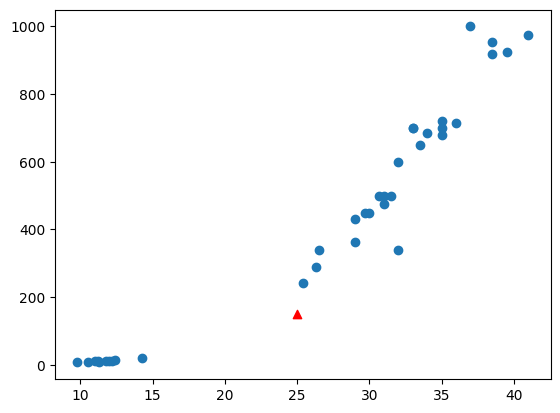

In [24]:
plt.scatter(
    train_input[:,0],
    train_input[:,1]
)
plt.scatter(
    25,
    150,
    marker='^',
    c='red'
)
plt.show()

### 이웃을 출력

In [25]:
distances, indexes = kn.kneighbors([[25,150]])
print(indexes)

[[11 20 13 22 15]]


In [26]:
train_input[indexes]

array([[[ 25.4, 242. ],
        [ 14.3,  19.7],
        [ 12.4,  13.4],
        [ 12.2,  12.2],
        [ 26.3, 290. ]]])

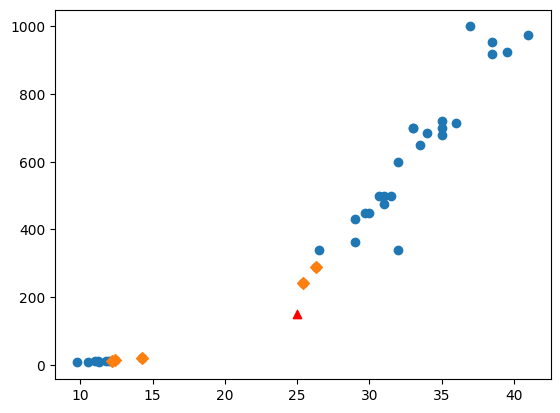

In [35]:
plt.scatter(
    train_input[:,0],
    train_input[:,1]
)
plt.scatter(
    25,
    150,
    marker='^',
    c='red'
)
plt.scatter(
    train_input[indexes,0],train_input[indexes,1],marker='D'
)
plt.show()

### 기준을 맞춘다 (x,y축 통일)

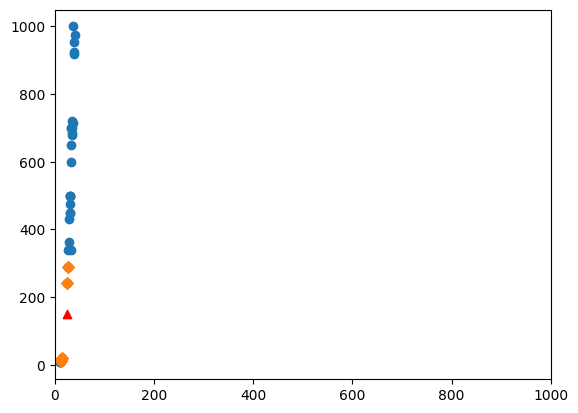

In [36]:
plt.scatter(
    train_input[:,0],
    train_input[:,1]
)
plt.scatter(
    25,
    150,
    marker='^',
    c='red'
)
plt.scatter(
    train_input[indexes,0],train_input[indexes,1],marker='D'
)
plt.xlim(0,1000)
plt.show()

In [37]:
# length와 weight의 평균과 표준편차를 구해서 비교해보기
mean = np.mean(train_input,axis=0)
std = np.std(train_input,axis=0)
print(mean,std)

[ 26.93333333 441.98333333] [ 10.09141549 325.61300692]


> 표준편차가 과도하게 크다

---
### train_data를 표준점수 (Z점수) 변경하자
- 표준점수 (변동계수) = (Feature - 평균) / 표준편차

In [38]:
train_scaled = (train_input-mean)/std
train_scaled

array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137],
       [ 1.14618873,  1.46805151],
       [-1.49962444, -1.32698425],
       [ 0.50207691,  0.48528979],
       [-1.47980562, -1.32729137],
       [ 0.89845341,  0.83539865],
       [ 0.60117103,  0.79240283],
       [-0.15194433, -0.61417489],
       [ 0.99754754,  1.71374194],
       [-1.44016797, -1.3162353 ],
       [-1.69781269, -1.33681187],
       [-0.06275961, -0.46676063],
       [ 0.79935928,  0.73098022],
       [ 0.40298278,  0.17817675],
       [-1.57889974, -1.32759848],
       [ 0.27416042,  0.02462023],
       [-1.25188913, -1.29688718],
       [ 0.79935928,  0.79240283],
       [-1.45998679, -1.31992065],
       [ 0.45252984,  0.17817675],
       [ 1.39392404,  1.63696368],
       [ 0.6507181 ,  0.63884631],
       [ 0.60117103,  0.79240283],
       [-1.62844681, -1.33435497],
       [-0.04294079,

In [39]:
# sklearn를 사용해서 변동계수 계산
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
scaler.fit(train_input)
train_scaled = scaler.transform(train_input)
train_scaled

array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137],
       [ 1.14618873,  1.46805151],
       [-1.49962444, -1.32698425],
       [ 0.50207691,  0.48528979],
       [-1.47980562, -1.32729137],
       [ 0.89845341,  0.83539865],
       [ 0.60117103,  0.79240283],
       [-0.15194433, -0.61417489],
       [ 0.99754754,  1.71374194],
       [-1.44016797, -1.3162353 ],
       [-1.69781269, -1.33681187],
       [-0.06275961, -0.46676063],
       [ 0.79935928,  0.73098022],
       [ 0.40298278,  0.17817675],
       [-1.57889974, -1.32759848],
       [ 0.27416042,  0.02462023],
       [-1.25188913, -1.29688718],
       [ 0.79935928,  0.79240283],
       [-1.45998679, -1.31992065],
       [ 0.45252984,  0.17817675],
       [ 1.39392404,  1.63696368],
       [ 0.6507181 ,  0.63884631],
       [ 0.60117103,  0.79240283],
       [-1.62844681, -1.33435497],
       [-0.04294079,

### 전처리 데이터로 모델 훈련하기

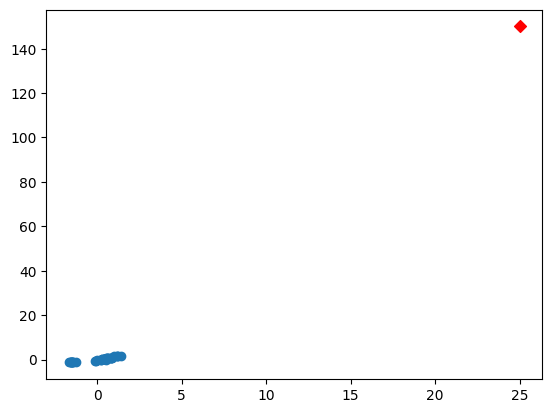

In [43]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25,150,marker='D',c='red')
plt.show()

In [42]:
# 예측할 데이터도 표준점수로 변경
new = ([25,150]-mean)/std
new

array([-0.19158198, -0.89671889])

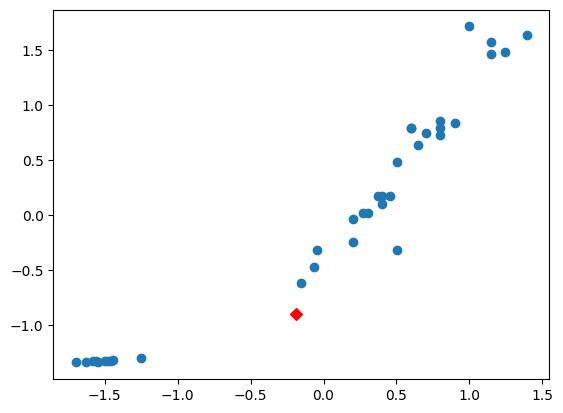

In [44]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='D',c='red')
plt.show()

### KNN

In [45]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [46]:
test_scaled = (test_input-mean)/std
test_scaled

array([[ 0.79935928,  0.86918109],
       [ 0.74981222,  0.54671239],
       [ 1.39392404,  1.56018542],
       [-1.18252324, -1.29627295],
       [-1.38071149, -1.31992065],
       [ 0.6507181 ,  0.51600109],
       [-1.49962444, -1.32667714],
       [ 0.70026516,  0.40851153],
       [-1.61853739, -1.33589053],
       [ 0.89845341,  1.25307238],
       [ 0.30388865, -0.15964759],
       [ 0.50207691,  0.48528979],
       [ 0.27416042,  0.17817675]])

---
# 중요   
## 1. train - test로 분리  
## 2. mean, std, 변동계수  
   ### train -> train의 mean, std   
   ### test -> test의 mean, std  
   ### 이렇게 따로 계산하는 것이 아니라 train의 mean, std를 test에 적용해야 한다 
# 까먹지말것   
---

# 새 데이터의 진짜 이웃 찾기

In [47]:
kn.predict([new])

array(['apple'], dtype=object)

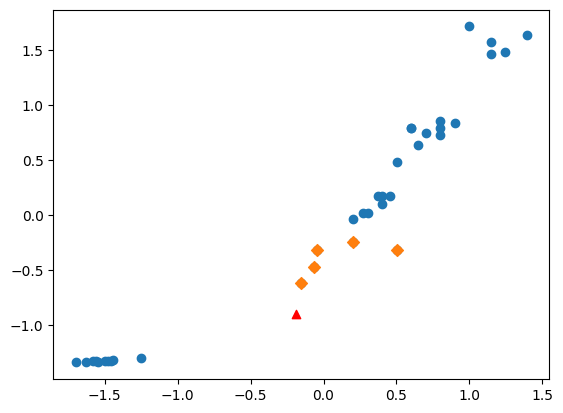

In [50]:
# 확인을 위해 이웃을 출력하자
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^',c='red')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')
plt.show()